# User Story 2
- User utilizes the CurrentExp class to initialize a whole experiment as an object
- User utilizes the yaml configuration files to run a sub-experiment with C=""Quant" on D="Car"
- Also a experimental configuration of C= ["MR-Hydra", "Quant","Weasel-D] x D="Swedish Leaf" x RandomSeeds [0,1] is executed
- Noise Trace Matrixes for given experiments as well as the Generation Process of Noise Transition Matrixes are illustrated
- The empirical concretization of these Noise Transition Matrices in Noice Trace Matrixes is revealed

In [1]:
import os
from pathlib import Path
import warnings
from tsml_eval.publications.y2023.tsc_bakeoff.run_experiments import _set_bakeoff_classifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import gridspec


#---- Ensure cwd = root_directory
cwd = Path.cwd()
if cwd.name == "notebooks":
    os.chdir(cwd.parent)

#---- Own module imports
from src.models.classifierWrapper import BakeoffClassifier
from src.data_handlers.basic_func import dataset_provider,dataset_overview, overview_of_bakeoff_cl
from src.utils.utilizations import load_and_expand_yaml, get_frames_and_names, setup_logger
from src.visuals.visualizations import visualize_acc_decr, visualize_trace_M, visualize_acc_decr_multiple
from src.current_experiment import Experiment



warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
logger = setup_logger("Basic_Func_Logger")
logger.info(f"Working directory set to:{os.getcwd()}")

plt.style.use(os.path.join(os.getcwd(), "configs", "visualisations.mplstyle"))


[2025-12-01 23:28:04] INFO - Custom-named logger active.
[2025-12-01 23:28:04] INFO - Custom-named logger active.
[2025-12-01 23:28:04] INFO - apply_dca.py logger active
[2025-12-01 23:28:04] INFO - Working directory set to:/Users/david/Documents/Studium D&E/Applied AI/David_MA


In [24]:
overview_of_bakeoff_cl(show_all_possible_names=False)

{'distance_based': ['1NN-DTW', 'GRAIL'], 'feature_based': ['Catch22', 'FreshPRINCE', 'TSFresh', 'Signatures'], 'shapelet_based': ['STC', 'RDST', 'RSF', 'MrSQM'], 'interval_based': ['R-STSF', 'RISE', 'TSF', 'CIF', 'STSF', 'DrCIF', 'QUANT'], 'dictionary_based': ['BOSS', 'cBOSS', 'TDE', 'WEASEL', 'WEASEL_V2'], 'convolution_based': ['ROCKET', 'MiniROCKET', 'MultiROCKET', 'Arsenal', 'Hydra', 'MR-Hydra'], 'deep_learning': ['CNN', 'ResNet', 'InceptionTime', 'H-InceptionTime', 'LITETime'], 'hybrid': ['HC1', 'HC2', 'RIST']}


In [2]:
configuration = load_and_expand_yaml("experiments/experiment_Car1.yaml")
configuration_2 = load_and_expand_yaml("experiments/experiment_2.yaml")
configuration_3 = load_and_expand_yaml("experiments/experiment_3.yaml")

# Load an explicit config and initialize the experiment
experiment = Experiment(config=configuration[0], base_path="112UCRFolds", results_root="simulation_results")

[2025-12-01 23:28:04] INFO - Loading and expanding YAML configuration from: experiments/experiment_Car1.yaml
[2025-12-01 23:28:04] INFO - YAML configuration expanded into 1 configurations
[2025-12-01 23:28:04] INFO - Loading and expanding YAML configuration from: experiments/experiment_2.yaml
[2025-12-01 23:28:04] INFO - YAML configuration expanded into 30 configurations
[2025-12-01 23:28:04] INFO - Loading and expanding YAML configuration from: experiments/experiment_3.yaml
[2025-12-01 23:28:04] INFO - YAML configuration expanded into 93 configurations
[2025-12-01 23:28:04] INFO - X_train             : (60, 1, 577)
[2025-12-01 23:28:04] INFO - y_train             : (60,)
[2025-12-01 23:28:04] INFO - X_test              : (60, 1, 577)
[2025-12-01 23:28:04] INFO - y_test              : (60,)
[2025-12-01 23:28:04] INFO - X_train_small       : (60, 1, 577)
[2025-12-01 23:28:04] INFO - y_train_small       : (60,)
[2025-12-01 23:28:04] INFO - X_test_small        : (60, 1, 577)
[2025-12-01 2

In [3]:
configuration

[{'DATASET_NAME': 'Car',
  'CLASSIFIER_NAME': 'QUANT',
  'REDUCTION_F': 1,
  'RANDOM_S': 0,
  'DCA': {'type': 'LabelErrors',
   'DoE_param': {'le_strategy': 'leV3',
    'p_vec': [[0, 0.9, 0.1, 0.1],
     [0.1, 0, 0.1, 0.1],
     [0.1, 0.9, 0.0, 0.1],
     [0.033, 0.9, 0.033, 0.0]],
    'random_seed': 0,
    'start': 0,
    'stop': 100,
    'step': 10}}}]

[2025-12-01 23:28:10] INFO - Run Experiment
[2025-12-01 23:28:10] INFO - Converting percentage-based DOE parameters to instance-based parameters
[2025-12-01 23:28:10] INFO - requested_instance_step = 6.0 will be transformed into 6
[2025-12-01 23:28:10] INFO - requested_percentage_step = 10 % || transformed into 10.0 %
[2025-12-01 23:28:10] INFO - Converting percentage-based DOE parameters to instance-based parameters
[2025-12-01 23:28:10] INFO - stop value is 100% --> set to number of instances
[2025-12-01 23:28:10] WARNING - Could not assign GPU: NVML Shared Library Not Found
[2025-12-01 23:28:10] INFO - label_names: ['1' '2' '3' '4']
[2025-12-01 23:28:10] INFO - p_vector: [[0.    0.9   0.1   0.1  ]
 [0.1   0.    0.1   0.1  ]
 [0.1   0.9   0.    0.1  ]
 [0.033 0.9   0.033 0.   ]]
[2025-12-01 23:28:10] INFO - The p_vector for the current_experiment is a matrix, with the probs:
{'1': array([0. , 0.9, 0.1, 0.1]), '2': array([0.1, 0. , 0.1, 0.1]), '3': array([0.1, 0.9, 0. , 0.1]), '4': ar

Cap reached


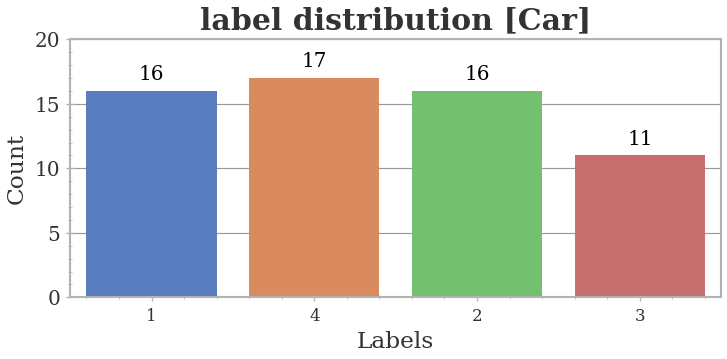

In [4]:
# Use experiment class methods 
experiment.dataset_overview()
experiment.run_experiment()

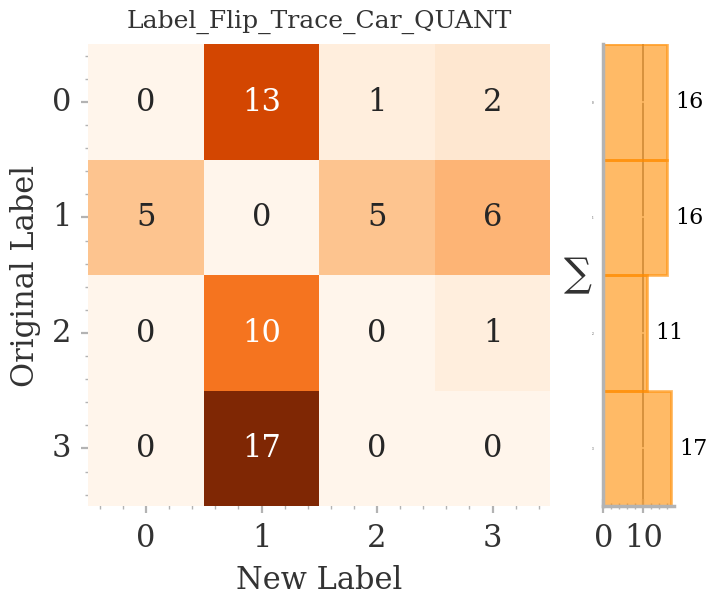

In [5]:
experiment.trace_M()

[2025-12-01 23:28:23] INFO - X_train             : (500, 1, 128)
[2025-12-01 23:28:23] INFO - y_train             : (500,)
[2025-12-01 23:28:23] INFO - X_test              : (625, 1, 128)
[2025-12-01 23:28:23] INFO - y_test              : (625,)
[2025-12-01 23:28:23] INFO - X_train_small       : (500, 1, 128)
[2025-12-01 23:28:23] INFO - y_train_small       : (500,)
[2025-12-01 23:28:23] INFO - X_test_small        : (625, 1, 128)
[2025-12-01 23:28:23] INFO - y_test_small        : (625,)
[2025-12-01 23:28:23] INFO - Initializing BakeoffClassifier with name: MR-Hydra, random_state: 0
[2025-12-01 23:28:23] INFO - Using 6 jobs for classifier training and prediction
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
[2025-12-01 23:28:23] INFO - Initializing Exp with dataset: SwedishLeaf, classifier: MR-Hydra, strategy: LabelErrors
[2025-12-01 23:28:23] INFO - and configuration with DCA-type: LabelErrors, DoE_param: {'le_strategy': 'leV1', 'p_vec

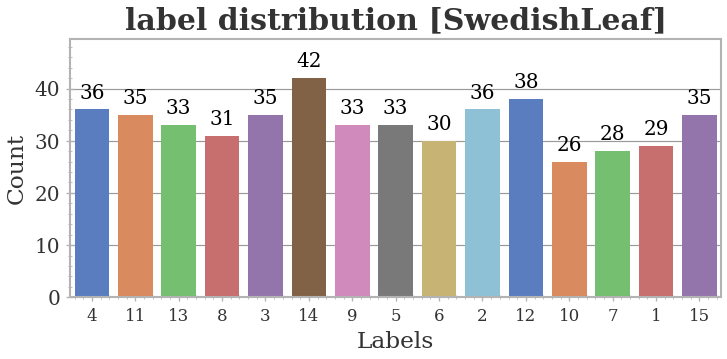

In [6]:
experiment_ = Experiment(config = configuration_2[0], base_path="112UCRFolds", results_root="simulation_results")
experiment_.dataset_overview()

In [7]:
#For running multiple experiments create an experimental_dict 

experimental_dict = {}
my_config = configuration_2[0:6]

for i_, exp_conf in enumerate(my_config):
    current_exp = Experiment(config=exp_conf, base_path="112UCRFolds", results_root="simulation_results")
    exp_name = "experiment_"+str(i_)
    current_exp.run_experiment()
    experimental_dict[exp_name]=[exp_conf, current_exp]

[2025-12-01 23:28:25] INFO - X_train             : (500, 1, 128)
[2025-12-01 23:28:25] INFO - y_train             : (500,)
[2025-12-01 23:28:25] INFO - X_test              : (625, 1, 128)
[2025-12-01 23:28:25] INFO - y_test              : (625,)
[2025-12-01 23:28:25] INFO - X_train_small       : (500, 1, 128)
[2025-12-01 23:28:25] INFO - y_train_small       : (500,)
[2025-12-01 23:28:25] INFO - X_test_small        : (625, 1, 128)
[2025-12-01 23:28:25] INFO - y_test_small        : (625,)
[2025-12-01 23:28:25] INFO - Initializing BakeoffClassifier with name: MR-Hydra, random_state: 0
[2025-12-01 23:28:25] INFO - Using 6 jobs for classifier training and prediction
[2025-12-01 23:28:25] INFO - Initializing Exp with dataset: SwedishLeaf, classifier: MR-Hydra, strategy: LabelErrors
[2025-12-01 23:28:25] INFO - and configuration with DCA-type: LabelErrors, DoE_param: {'le_strategy': 'leV1', 'p_vec': 'None', 'random_seed': 0, 'start': 0, 'stop': 100, 'step': 5}
[2025-12-01 23:28:25] INFO - Run

Cap reached
Cap reached
Cap reached
Cap reached


[2025-12-01 23:28:25] INFO - Current Label Error Strategy: DEFAULT: leV1
[2025-12-01 23:28:25] INFO - The p_vector for the current_experiment: [0.0667, 0.0667, 0.0667, 0.0667, 0.0667, 0.0667, 0.0667, 0.0667, 0.0667, 0.0667, 0.0667, 0.0667, 0.0667, 0.0667, 0.0667]
[2025-12-01 23:28:25] INFO - Searching inside simulation_results/MR-Hydra/SwedishLeaf for results
[2025-12-01 23:28:25] INFO - Looking for files matching pattern: leV1_1_(\d+)_(\d+)_(\d+) with start=0, stop=500, step=25
[2025-12-01 23:28:25] INFO - 📁 Found directories: ['leV1_0_0_500_10', 'leV1_1_0_500_25']
[2025-12-01 23:28:25] INFO - ✅ Exact match found: leV1_1_0_500_25
[2025-12-01 23:28:25] INFO - Loading existing trajectory from simulation_results/label_errors/SwedishLeaf/leV1/SwedishLeaf_le_traj.parquet
[2025-12-01 23:28:25] INFO - ✅ Results loaded from: simulation_results/MR-Hydra/SwedishLeaf/leV1_1_0_500_25
[2025-12-01 23:28:25] INFO - X_train             : (500, 1, 128)
[2025-12-01 23:28:25] INFO - y_train             

Cap reached
Cap reached


In [8]:
experimental_dict.keys()

dict_keys(['experiment_0', 'experiment_1', 'experiment_2', 'experiment_3', 'experiment_4', 'experiment_5'])

In [9]:
#The experimental_dict has every experiment numbered as key names.
#Once accesed it returns the configuration [0] or the Experiment Class object [1]:
# Here you can see all relevant configuration details.

experimental_dict["experiment_1"][0]

{'DATASET_NAME': 'SwedishLeaf',
 'CLASSIFIER_NAME': 'Quant',
 'REDUCTION_F': 1,
 'RANDOM_S': 0,
 'DCA': {'type': 'LabelErrors',
  'DoE_param': {'le_strategy': 'leV1',
   'p_vec': 'None',
   'random_seed': 0,
   'start': 0,
   'stop': 100,
   'step': 5}}}

In [10]:
#You can use every method defined in the Experiment() Class like acessing the respective DataFrame object:
experimental_dict["experiment_1"][1].df_.iloc[15:17]

,step,LE_instances,LE_relative,accuracy,train_time,eval_time,y_train_history,y_pred,y_pred_prob
15,16,150,0.30,0.9424,2.0230,0.2995,"[12, 11, 13, 4, 13, 3, 5, 14, 6, 11, 13, 8, 9,...","[10, 11, 8, 12, 14, 1, 5, 11, 13, 6, 1, 15, 14...","[[0.0, 0.515, 0.08, 0.065, 0.055, 0.025, 0.0, ..."
16,17,160,0.32,0.9264,2.0421,0.2991,"[12, 11, 13, 4, 13, 3, 5, 14, 6, 11, 13, 8, 9,...","[10, 11, 8, 12, 14, 1, 5, 11, 13, 6, 3, 15, 14...","[[0.01, 0.515, 0.095, 0.1, 0.055, 0.02, 0.005,..."


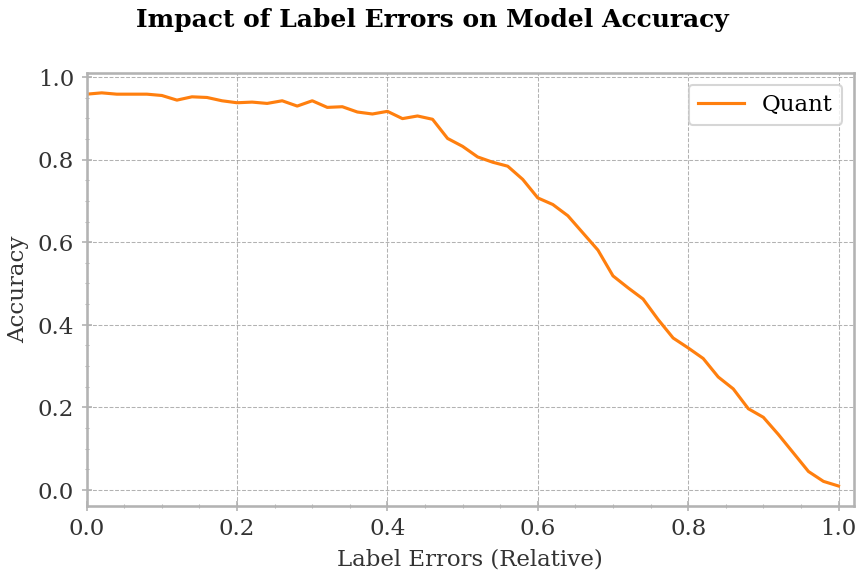

In [11]:
experimental_dict["experiment_1"][1].acc_decr()
#or use the function directly
#visualize_acc_decr(experimental_dict["experiment_1"][1].df_, first="relative", cl_="MR-Hydra")

In [12]:
# With get_frames_and_names the exp_dict will be unpacked in the
#1 DataFrames, 2 ClassifierNames, 3Dataset_name, 4 ClassifierName_withSeed (if there are multiple RS chosen)
dfs_, clfs_, ds_names_, clfs_seed_ = get_frames_and_names(exp_dict = experimental_dict)

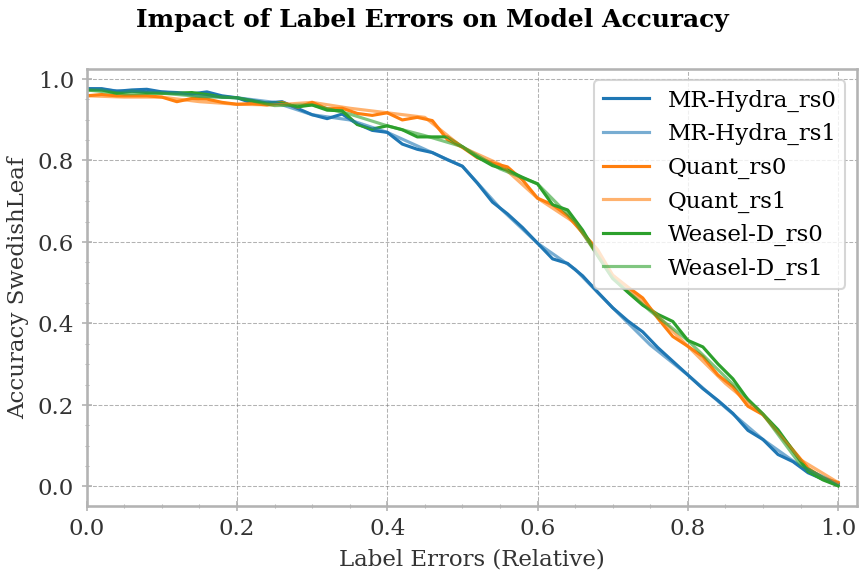

In [13]:
visualize_acc_decr_multiple(multiple_df=dfs_, vis_names_=clfs_seed_, ds_="SwedishLeaf", filename_="acc_decr", save_fig=False, exp_folder=None)

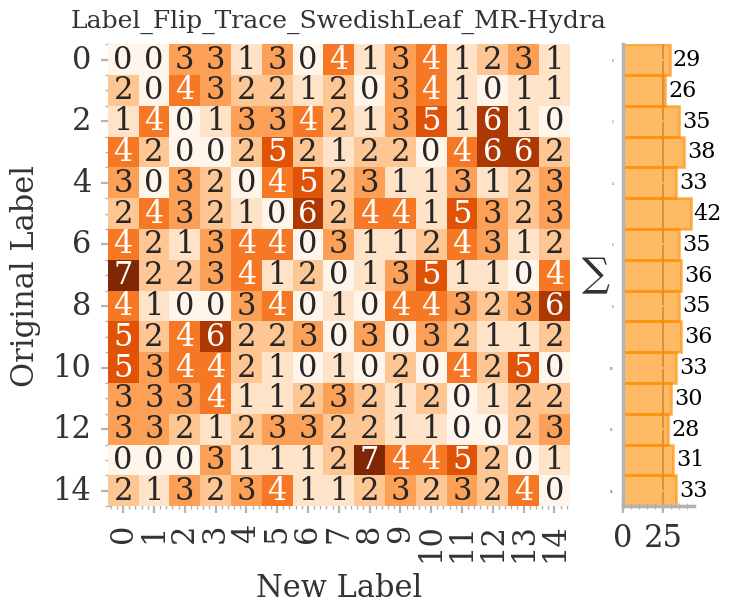

In [14]:
# The trace Matrix is accesible as a class function aswell
experimental_dict["experiment_0"][1].trace_M()

In [15]:
# Create different noise matrices 

p_vector = [0.42143123,0.122323,0.232342,0.2334234]
p = [[0, 0.9, 0.1, 0.1], [0.1, 0, 0.1, 0.1], [0.1, 0.9, 0.0, 0.1], [0.033, 0.9, 0.033, 0.0]]
noise_matrix = np.array([[0, 0.14, 0.08, 0.07], [0.12, 0, 0.11, 0.09], [0.1, 0.16, 0.0, 0.1], [0.04, 0.07, 0.13, 0.0]])
noise_matrix_to_minority = np.array([[0, 5, 4, 3], [4, 0, 3, 2], [2, 7, 0, 3], [3, 6, 4, 0 ]])
noise_matrix_uni = np.array([[0, 1, 1, 1], [1, 0, 1, 1], [1, 1, 0.0, 1], [1, 1, 1, 0.0]])

noise_matrix_norm = noise_matrix / noise_matrix.sum()
noise_matrix_uni_norm = noise_matrix_uni / noise_matrix_uni.sum()
noise_matrix_to_minority_norm = noise_matrix_to_minority / noise_matrix_to_minority.sum()
n_m_s = noise_matrix.sum(axis=1)
n_m_s= n_m_s / n_m_s.sum()
noise_matrix_100 = noise_matrix_norm * 100

noise_matrix_to_minority_norm

array([[0.        , 0.10869565, 0.08695652, 0.06521739],
       [0.08695652, 0.        , 0.06521739, 0.04347826],
       [0.04347826, 0.15217391, 0.        , 0.06521739],
       [0.06521739, 0.13043478, 0.08695652, 0.        ]])

In [16]:
# Create different flip trajectories (one dataset is needed in this case: CAR)
from src.dca.le_func import create_label_flip_trajectory

car_y_train = experiment.dataset["y_train_small"]
unique_classes = np.unique(car_y_train)

flip_traject = create_label_flip_trajectory(train_array=car_y_train, p_vector=noise_matrix)
flip_traject2 = create_label_flip_trajectory(train_array=car_y_train, p_vector=noise_matrix_uni)
flip_traject3 = create_label_flip_trajectory(train_array=car_y_train, p_vector=noise_matrix_to_minority)

[2025-12-01 23:28:39] INFO - Using noise matrix mode: row-normalized matrix activated.
[2025-12-01 23:28:39] INFO - noise_matrix_class_norm: [0.23966942 0.26446281 0.29752066 0.19834711]
[2025-12-01 23:28:39] INFO - Using noise matrix mode: row-normalized matrix activated.
[2025-12-01 23:28:39] INFO - noise_matrix_class_norm: [0.25 0.25 0.25 0.25]
[2025-12-01 23:28:39] INFO - Using noise matrix mode: row-normalized matrix activated.
[2025-12-01 23:28:39] INFO - noise_matrix_class_norm: [0.26086957 0.19565217 0.26086957 0.2826087 ]


In [18]:
#load trace matric from trajectory to compare Noise Transition and Noise Trace Matrix

def load_trace_from_trajectory(df):
    label_names = np.unique(np.concatenate([df["from"].unique(), df["to"].unique()]))
    label_to_idx = {label: idx for idx, label in enumerate(label_names)}
    trace_matrix = np.zeros((len(label_names), len(label_names)), dtype=int)

    for _, row in df.iterrows():
        i = label_to_idx[row["from"]]   # original label index
        j = label_to_idx[row["to"]]     # new label index
        trace_matrix[i, j] += 1

    return trace_matrix


trace_M = load_trace_from_trajectory(df=flip_traject)
trace_M_uni = load_trace_from_trajectory(df=flip_traject2)
trace_M_to_minority = load_trace_from_trajectory(df=flip_traject3)

In [19]:
trace_M_to_minority

array([[0, 8, 4, 4],
       [2, 0, 6, 8],
       [4, 3, 0, 4],
       [3, 9, 5, 0]])

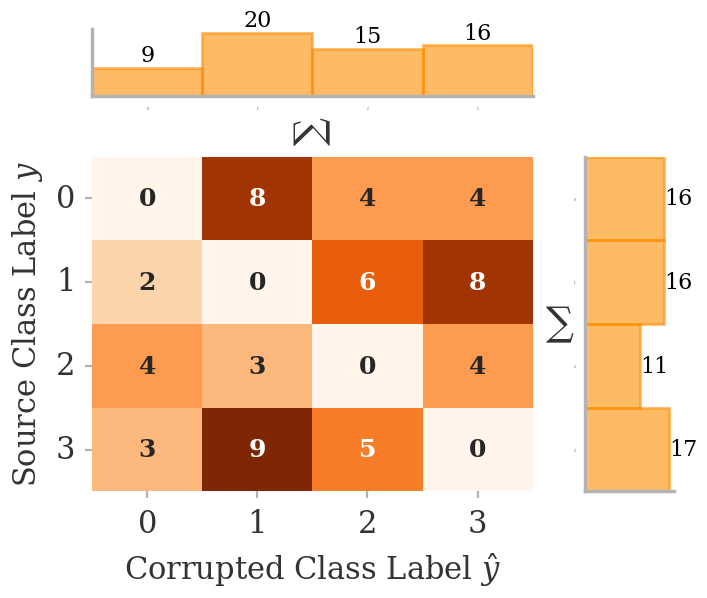

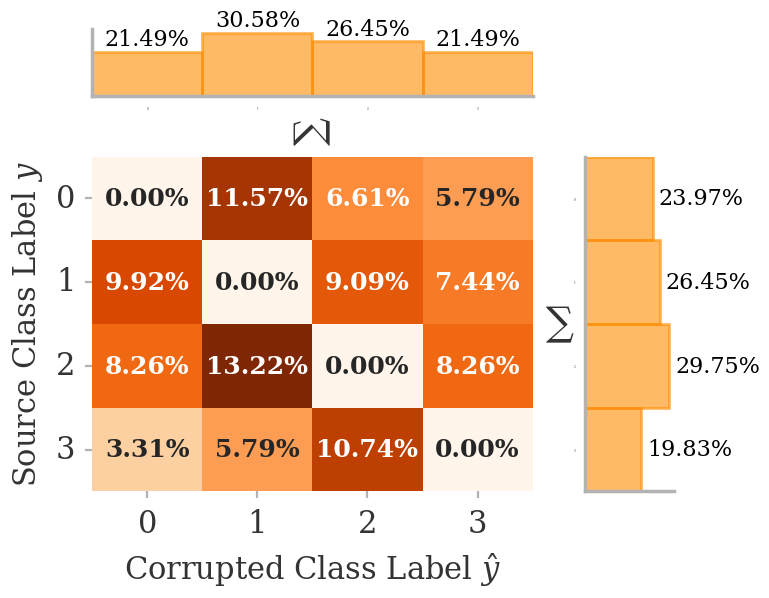

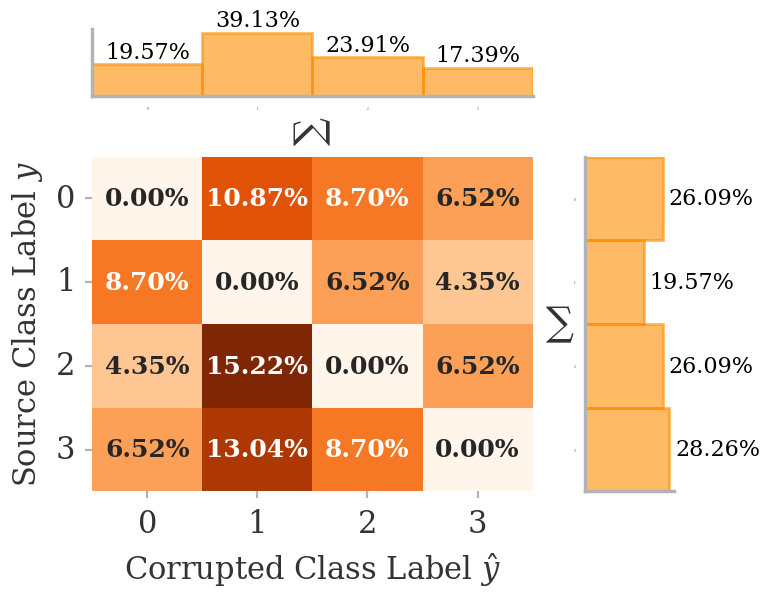

In [26]:
def plot_noise_matrix(noise_matrix, percentage_mode=True):
    """
    Plots a heatmap of a noise/confusion matrix with a side bar plot of row sums.

    Parameters
    ----------
    noise_matrix : 2D numpy array or DataFrame
        Raw or normalized noise/confusion matrix.
    percentage_mode : bool
        If True, matrix values and bar labels are shown in percentages.
        If False, values are shown as raw integers.
    """

    # --- Precompute row sums ---
    row_sums = noise_matrix.sum(axis=1)
    col_sums = noise_matrix.sum(axis=0)

    # --- Choose annotation format ---
    if percentage_mode:
        fmt = ".2%"
        annotation_data = noise_matrix
        bar_label_fmt = lambda v: f"{v:.2%}"
    else:
        fmt = "d"
        annotation_data = noise_matrix.astype(int)
        bar_label_fmt = lambda v: f"{int(v)}"

    # --- Create figure ---
    fig = plt.figure(figsize=(3.75, 3), dpi=200)
    gs = gridspec.GridSpec(2, 2,
                        height_ratios=[1,5],
                        width_ratios=[5, 1],
                        wspace=0.2,
                        hspace=0.3)

    # --- Heatmap ---
    ax0 = plt.subplot(gs[1, 0])
    sns.heatmap(annotation_data,
                annot=True,
                annot_kws={"fontsize":"9", "fontweight": "bold"},
                #annot_kws={"fontweight": "bold"},
                linewidths=0,
                fmt=fmt,
                cbar=False,
                cmap='Oranges',
                ax=ax0)

    #ax0.set_ylabel('Original Label')
    ax0.set_ylabel(r"Source Class Label $y$")
    ax0.set_xlabel(r"Corrupted Class Label $\hat{y}$")
    #ax0.set_xlabel('New Label')
    #ax0.set_title("Label Noise Matrix", size=9)
    ax0.set_yticklabels(ax0.get_yticklabels(), rotation=0)
    ax0.minorticks_off()

    # --- Bar plot right---
    ax1 = plt.subplot(gs[1, 1], sharey=ax0)
    bars = ax1.barh(
        np.arange(len(row_sums)),
        row_sums,
        height=1,
        color='darkorange',
        align="edge",
        alpha=0.6,
        edgecolor="darkorange"
    )

    # Annotate bars
    for bar, value in zip(bars, row_sums):
        ax1.text(
            bar.get_width() + 0.02,
            bar.get_y() + bar.get_height() / 2,
            bar_label_fmt(value),
            va='center', ha='left', fontsize=8
        )

    # Styling
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.tick_params(axis="y", which="both", length=0, labelsize=0, color="white", grid_color="white")
    ax1.grid(False)
    ax1.set_xticks([])

    # y-label
    ax1.set_ylabel(r'$\sum$', rotation=0, fontsize=10, labelpad=5, va='center')


    ax2 = plt.subplot(gs[0, 0], sharex=ax0)
    bars_top = ax2.bar(np.arange(len(col_sums)),
                       col_sums,
                       width=1,
                       color='darkorange',
                       align='edge',
                       alpha=0.6,
                       edgecolor='darkorange')

    # Annotate bars (top)
    for bar, value in zip(bars_top, col_sums):
        ax2.text(bar.get_x() + bar.get_width()/2,
                 bar.get_height() + (col_sums.max() * 0.02),
                 bar_label_fmt(value),
                 ha='center', va='bottom', fontsize=8)
        
    ax2.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax2.tick_params(axis="x", which="both", length=0, labelsize=0, color="white", grid_color="white")
    ax2.grid(False)
    ax2.set_xlabel(r'$\sum$', fontsize=10, labelpad=2, rotation=90)  # top label
    ax2.set_yticks([])




    #fig.tight_layout()
    return fig, (ax0, ax1, ax2)
plt.style.use(os.path.join(os.getcwd(), "configs", "visualisations.mplstyle"))

fig1, axes= plot_noise_matrix(noise_matrix=trace_M_to_minority, percentage_mode=False)
fig1.savefig("figures/trace_M_to_minority.pdf")

fig2, axes2 = plot_noise_matrix(noise_matrix=noise_matrix_norm, percentage_mode=True)
fig2.savefig("figures/noise_M_complex.svg")

fig3, axes3 = plot_noise_matrix(noise_matrix=noise_matrix_to_minority_norm, percentage_mode=True)
fig3.savefig("figures/noise_M_to_minority.pdf")

